# 1. GOAL

#### Our goal is to build and train a neural network, which recognizes handwritten digits with a mind-blowing accuracy. It will be able to recognize the digits from 0 to 9.

# 2. REQUIRED LIBRARIES

In [ ]:
! pip install opencv-python

In [4]:
! pip install opencv-python-headless


In [5]:
import cv2   # it will allow us to load our images into the script
import numpy as np   # used for reformatting our own images
import tensorflow as tf   # main library used to load data sets, build neural networks, train them, etc.
import matplotlib.pyplot as plt   # used for visualization

# 3. LOADING AND PREPARING DATA

- MNIST dataset contains 60,000 training examples and 10,000 testing examples of handwritten digits that are already classified correctly. 
- These images have a resolution of 28x28 pixels.
- We will use the *keras* module, in order to load the dataset.
- In order to get the dataset, we access the *mnist* object from the *keras.datasets*.
- Then we call the *load_function* dataset. This function automatically splits the data appropriately and returns a tuple with the training data and a tuple with the testing data.

In [6]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [7]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


# 4. PLOTTING THE DATA

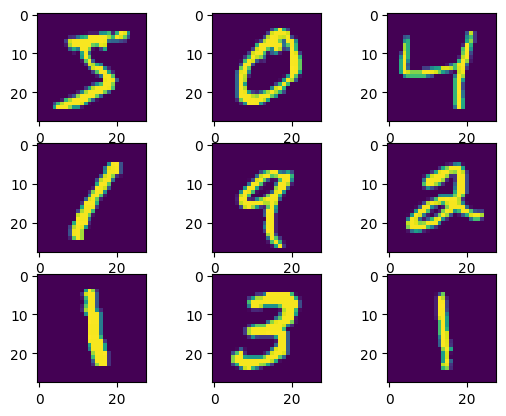

In [19]:
# plotting the first 9 images in the train set of MNIST
 
fig, axs = plt.subplots(3, 3) 
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

# 5. NORMALIZE THE DATA

- In order to make the whole data easier to process, we are going to normalize it. This means that we scale down all the values so that they end up between 0 and 1.
- For this we use the normalize function of *keras.uitils*.

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [22]:
y_train.shape

(60000,)

# 6. BUILDING THE NEURAL NETWORK

- We use the *models* module from *keras* to create a new neural network. The *Sequential* constructor does this for us.

In [ ]:
model = tf.keras.models.Sequential()

2022-08-22 13:33:31.696060: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


- Now we have a model, which doesn't have any layers in it. Those have to be added manually.

In [ ]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))   # input layer

- We start out by adding a so-called *Flatten* layer as our first layer.
- In order to add a layer to our model, we use the *add* function. Then we can choose the kind of layer that we want from the *layers* module.
- We specified an input shape of 28x28 which represents the resolution of images.
- What a flattened layer basically does is it flattens the input and makes it one dimensional. So instead of a 28x28 grid, we end up with 784 neurons lined up.

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 1st hidden layer
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))   # 2nd hidden layer

- We added two dense layers. These are our hidden layers and increase the complexity of our model.
- Both layers have 128 neurons each.
- The activation function is ReLU function.
- Dense layers connect every neuron of this layer with all the neurons of the next and previous layer.

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))   # output layer

- Last but not least we add an output layer. This one is also a dense layer but it only has 10 neurons and a different activation function.
- The values of the 10 neurons indicate how much our model believes that the respective number is the right classification.
- The first neuron is for the zero, the second for the one and so on.
- The activation function that we use here is the *softmax* function. This function scales the output values so that they all add upto one. Thus it transforms the absolute values into relative values.- 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# 7. COMPILING THE MODEL

- Before we start training and testing our model, we need to compile it first. This optimizes it and we can also choose a loss function.
- An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy. 

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 8. TRAINING AND TESTING

- Now, we get to the essential part of the whole project - the training and testing.
- For this, we just have to use the *fit* function of our model.

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=100)

2022-08-22 13:33:32.135223: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.3481 - accuracy: 0.9021
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1440 - accuracy: 0.9561
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0977 - accuracy: 0.9701
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9776
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0579 - accuracy: 0.9813
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0451 - accuracy: 0.9858
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0364 - accuracy: 0.9881
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0288 - accuracy: 0.9908
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0237 - accuracy: 0.9927
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0185 - accuracy: 0.9941

- *epochs* - This number defines how many times our model is going to see the same data over and over again.
- *batch_size* - This refers to the number of training examples utilized in one iteration.

# 9. MODEL EVALUATION

- We use the evaluate method and pass our testing data, to determine the accuracy and the loss.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 0s 963us/step - loss: 0.1014 - accuracy: 0.9734
0.10141128301620483
0.9733999967575073


# 10. PREDICTION

- We use *predict* method to make prediction of our image.

In [ ]:
prediction = model.predict([X_test])
prediction

array([[2.9349448e-10, 3.3309765e-11, 1.0354743e-08, ..., 9.9999917e-01,
        6.2142583e-11, 7.7787547e-08],
       [4.8538640e-10, 4.0755052e-07, 9.9999952e-01, ..., 1.7000990e-12,
        8.4871013e-11, 6.4902629e-16],
       [9.7376351e-10, 9.9995279e-01, 2.7530501e-07, ..., 8.8338511e-06,
        2.7675973e-05, 8.1236822e-09],
       ...,
       [1.3523556e-13, 1.6645138e-10, 1.6359313e-14, ..., 4.5651916e-08,
        1.6748289e-10, 6.2406334e-06],
       [9.7709503e-09, 6.3724924e-12, 8.8690574e-12, ..., 4.6107194e-09,
        6.0486718e-07, 2.3434598e-12],
       [1.0399030e-07, 2.1563721e-14, 2.3253503e-10, ..., 2.3800863e-17,
        4.4567935e-13, 2.3413430e-12]], dtype=float32)

- This prediction consists of the ten activations or probabilities from the output neurons. 
- Since we need to generate a result out of that, we are going to use the *argmax* function. This function returns the index of the highest value.
- In this case this is equivalent to the digit with the highest probability or activation.

In [ ]:
# let us do prediction for single image

print('Probabilities: ', prediction[10])
print('\n')
print('Prediction: ', np.argmax(prediction[10]))

Probabilities:  [9.9999976e-01 1.7582399e-12 2.4346406e-07 6.0311708e-12 6.1854879e-12
 3.0335165e-10 1.7363382e-08 5.0781473e-11 5.7054621e-12 5.5353344e-09]


Prediction:  0


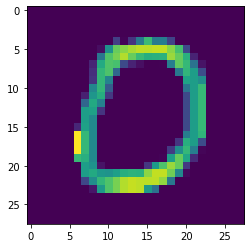

In [ ]:
# visualize the image

plt.imshow(X_test[10])
plt.show()

- We can see that our model is pretty accurate. But it can still make mistakes, especially if we tend to write digits in a very unusual way.

**Reference:**

https://www.amazon.in/Python-Bible-Networks-Tensorflow-Learning-ebook/dp/B0854PPMLS/ref=sr_1_1?crid=33REOU4OQVMGO&keywords=the+python+bible+volume+6&qid=1661174448&sprefix=the+python+bible+volume+6%2Caps%2C397&sr=8-1